In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set default styles for plots
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # fontsize of the legend
plt.rc('figure', titlesize=18)   # fontsize of the figure title

# Define the two directories
week5_directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/forwards/ArielInstrumentTier2"

# Read subfolders from both
subfolders_week5 = [name for name in os.listdir(week5_directory) if os.path.isdir(os.path.join(week5_directory, name))]

print(f"Week5 subfolders: {subfolders_week5}")


Week5 subfolders: ['GJ3090bFiduR', 'HD191939bFiduR', 'TOI-269bFiduR', 'TOI-1468cMigR', 'TOI-1136eFidu', 'HIP94235bMig', 'HD28109dMig', 'TOI-776bFiduR', 'K2-25bFidu', 'HD93963AcFiduR', 'TOI-1136bFidu', 'HD110113bMigR', 'TOI-1266bFiduR', 'TOI-782bMigR', 'TOI-2136bMigR', 'G9-40bMig', 'TOI-4479bMig', 'K2-3bFidu', 'TOI-4438bFiduR', 'HD191939dFiduR', 'TOI-451cFiduR', 'HD63433bFidu', 'TOI-1136eMigR', 'TOI-421bFidu', 'piMencMig', 'HD63433cMig', 'TOI-2120bMigR', 'TOI-1201bMig', 'TOI-2015bFiduR', 'HD191939cFidu', 'TOI-1136bMigR', 'LP791-18cFiduR', 'LTT3780cMigR', 'TOI-1136gMigR', 'TOI-269bMig', 'TOI-251bFidu', 'HD110113bMig', 'K2-26bFiduR', 'TOI-904bMigR', 'TOI-1201bMigR', 'K2-138gFiduR', 'TOI-2136bFidu', 'HD191939bMigR', 'HD191939dFidu', 'G9-40bMigR', 'TOI-1136eMig', 'TOI-700cMig', 'TOI-782bFidu', 'HD86226cMig', 'TOI-1470cMigR', 'TOI-270cMig', 'TOI-663bMigR', 'TOI-1801bFidu', 'HD63935bFiduR', 'GJ1214bFiduR', 'HD191939cMigR', 'TOI-251bMigR', 'TOI-4479bFidu', 'HD93963AcMigR', 'TOI-4438bMig', 'TOI

['HD63433c', 'K2-138g', 'TOI-1136e', 'TOI-782b', 'K2-417b', 'TOI-1470c', 'GJ3090b', 'K2-3b', 'TOI-1136c', 'TOI-1266b', 'TOI-421b', 'TOI-4336Ab', 'TOI-700c', 'TOI-451c', 'HD108236d', 'HD93963Ac', 'TOI-122b', 'K2-26b', 'TOI-663b', 'TOI-1136g', 'TOI-269b', 'TOI-270d', 'TOI-2120b', 'HD108236e', 'TOI-1801b', 'TOI-776c', 'Kepler-109c', 'piMenc', 'K2-25b', 'HD191939d', 'TOI-1470b', 'HD63433b', 'TOI-1266c', 'HIP94235b', 'TOI-776b', 'HD63935b', 'HD110113b', 'TOI-4479b', 'TOI-2136b', 'LP791-18c', 'HD109833b', 'TOI-2015b', 'TOI-561c', 'TOI-663c', 'HD191939b', 'LTT3780c', 'TOI-1201b', 'TOI-1136b', 'GJ1214b', 'TOI-270c', 'G9-40b', 'TOI-4438b', 'TOI-904b', 'HD191939c', 'TOI-1468c', 'HD86226c', 'K2-138f', 'TOI-251b', 'HD28109d']


/tmp/ipykernel_3735153/1466719874.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 6))


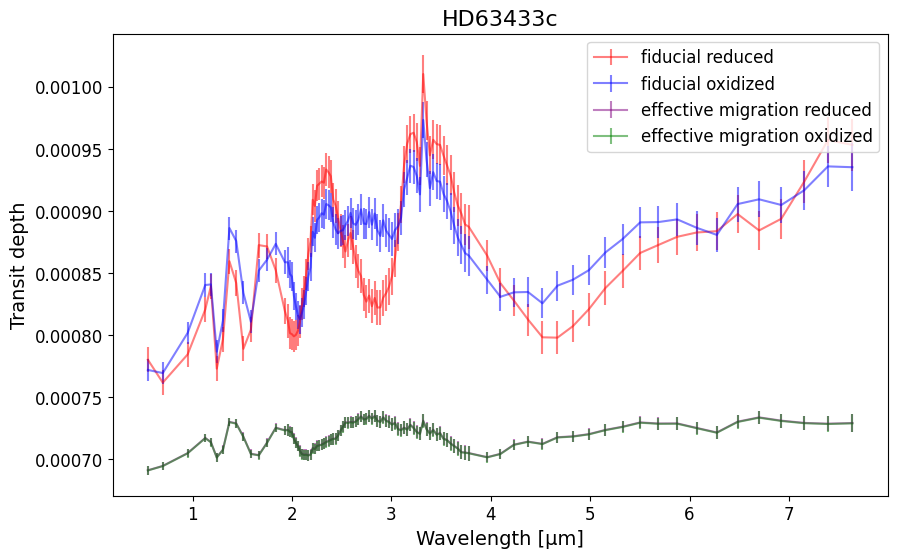

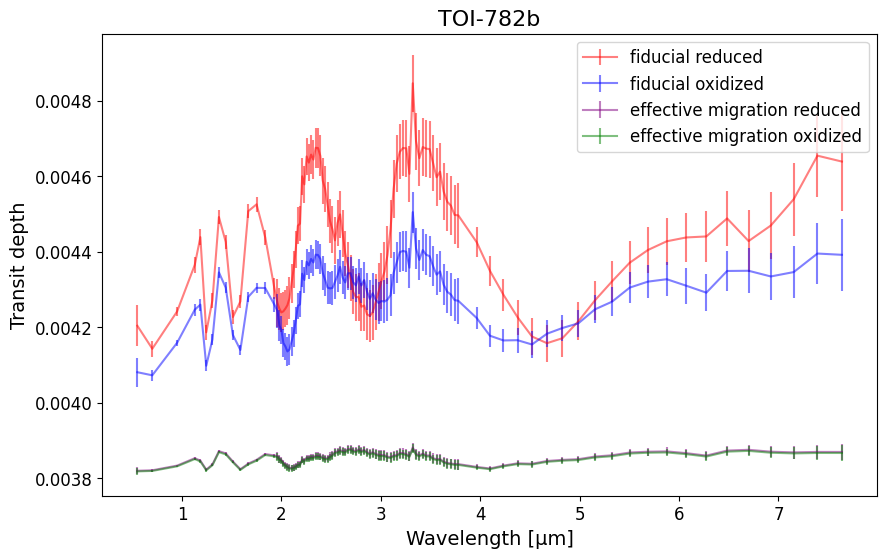

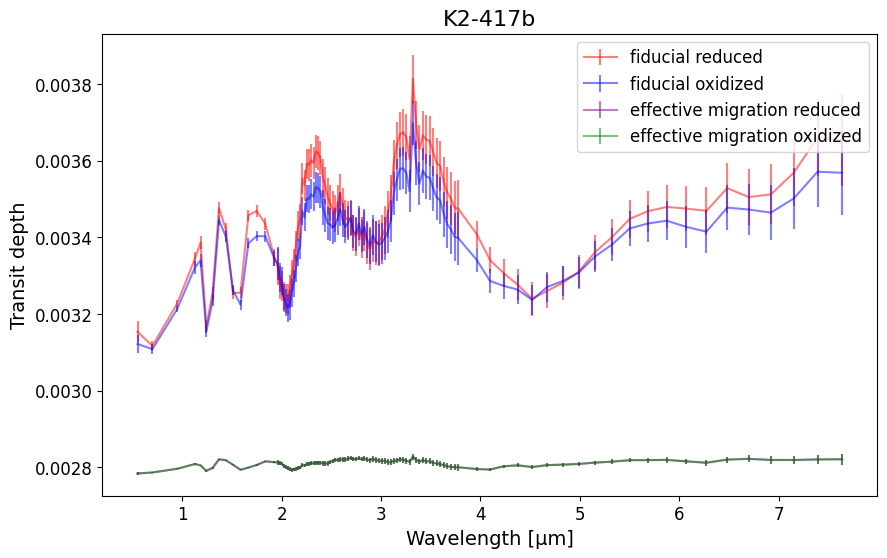

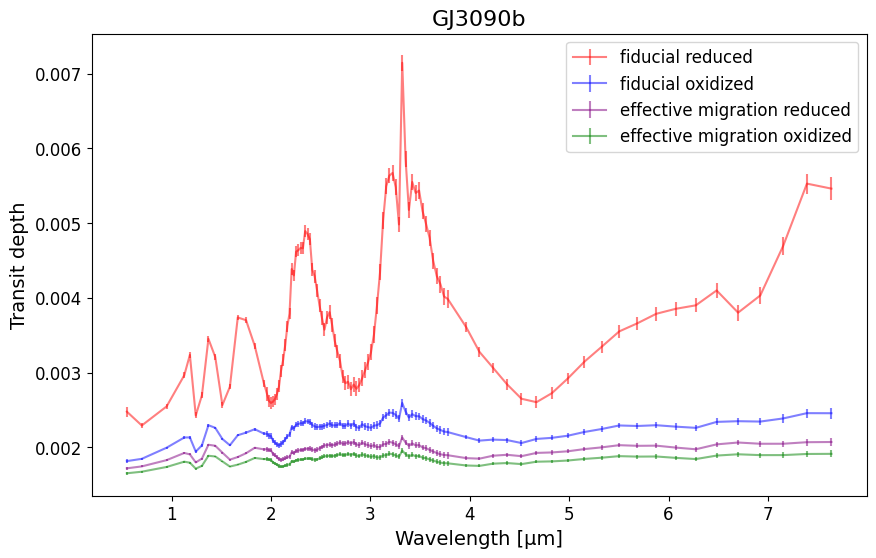

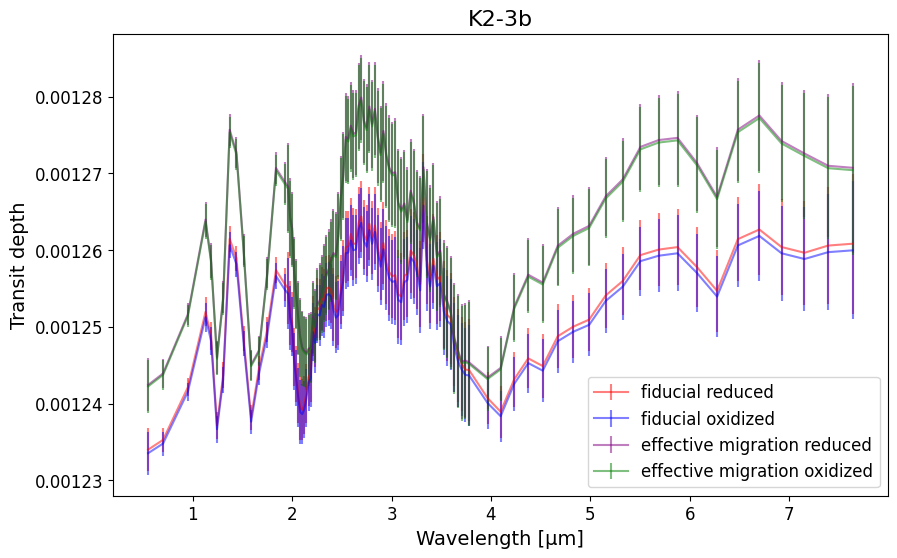

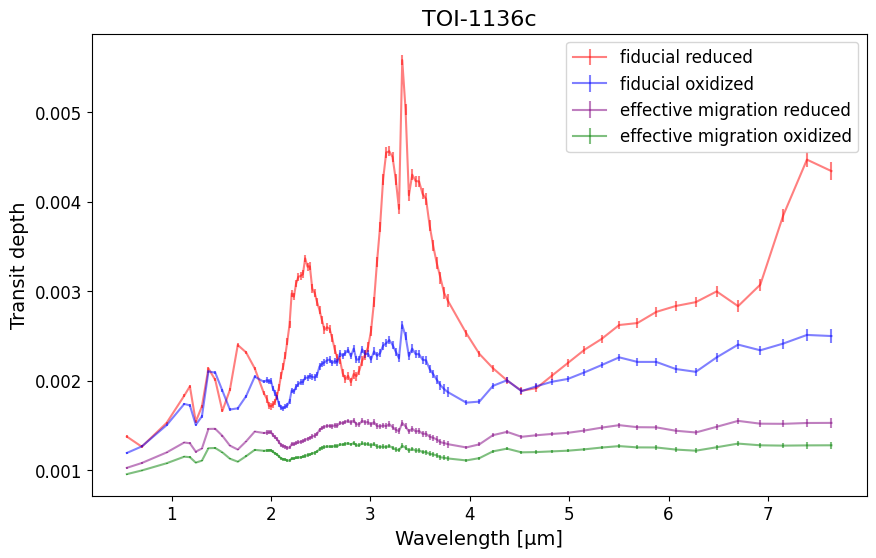

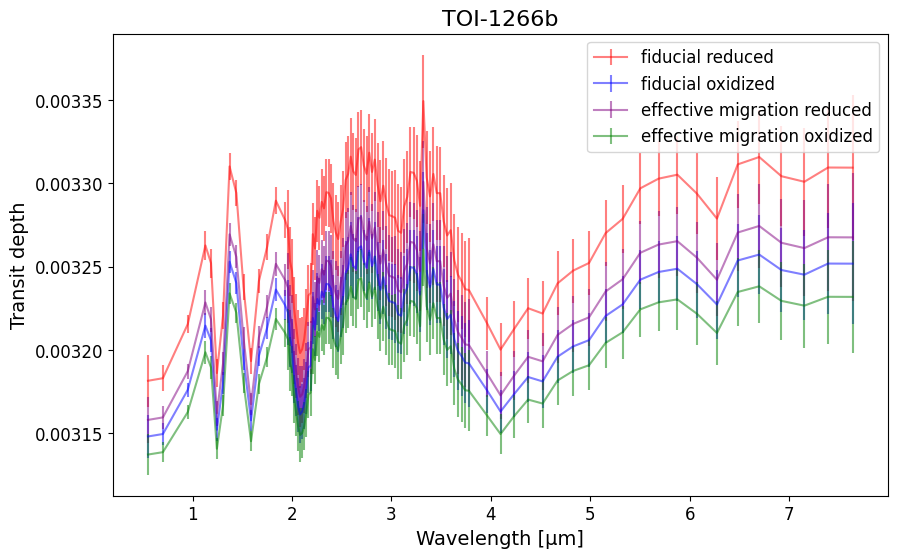

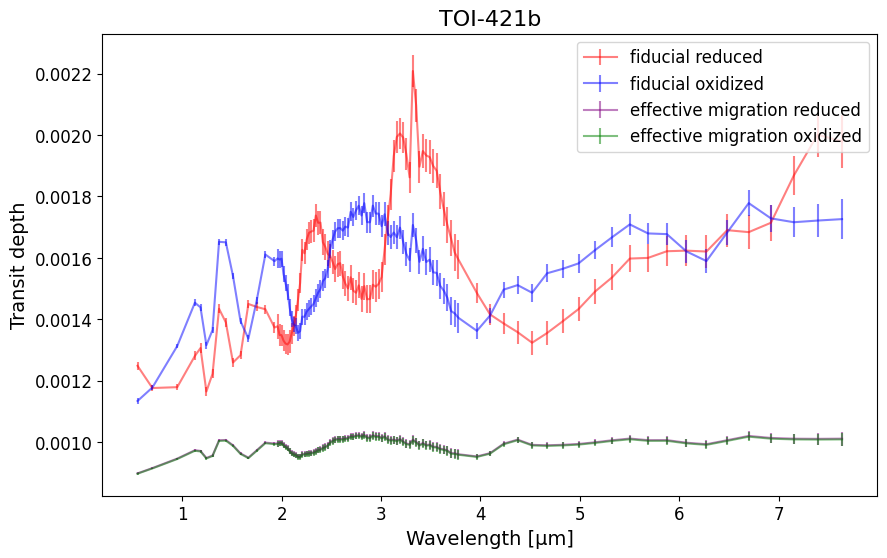

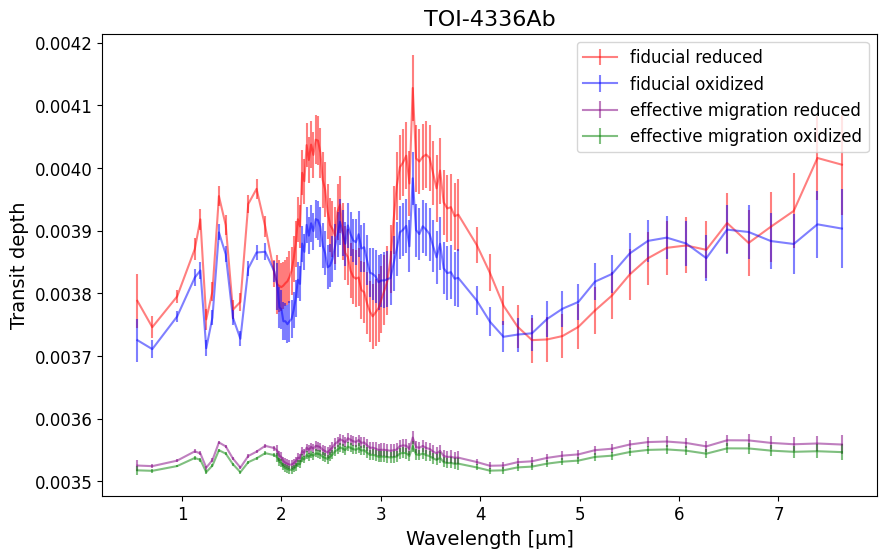

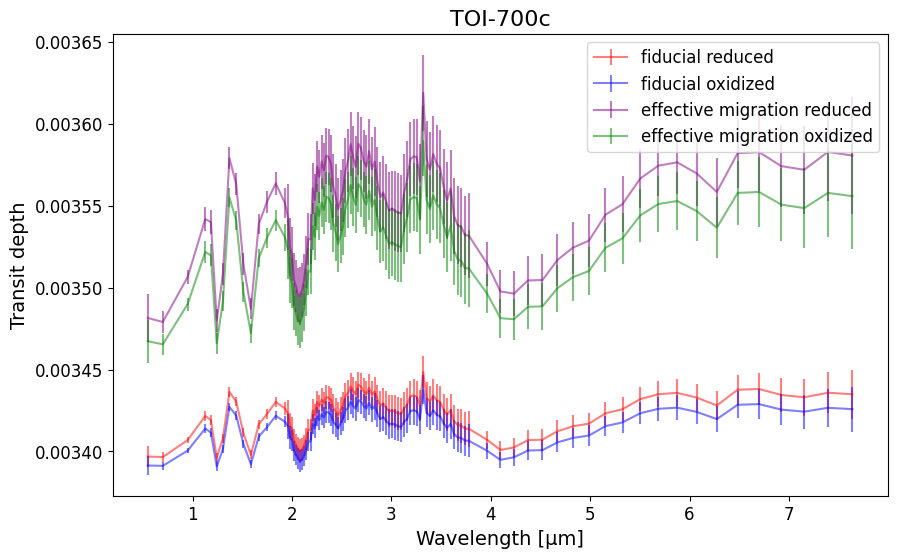

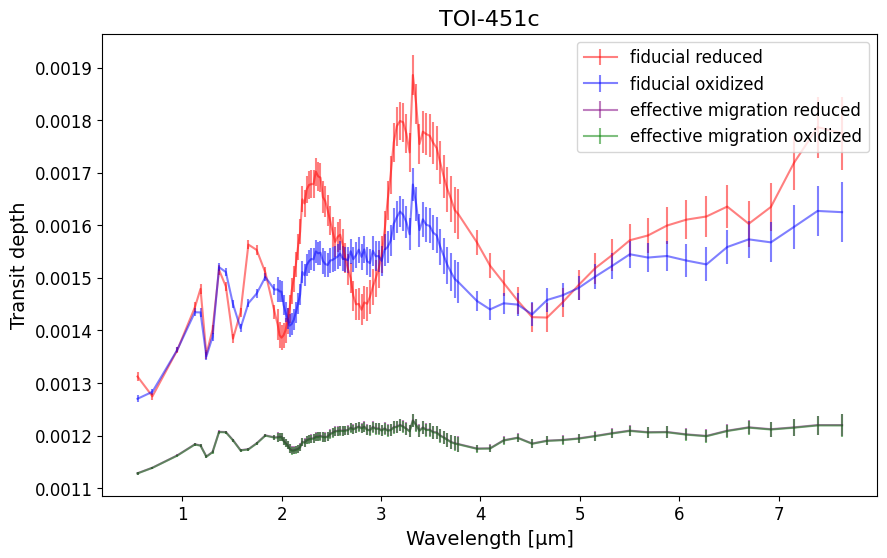

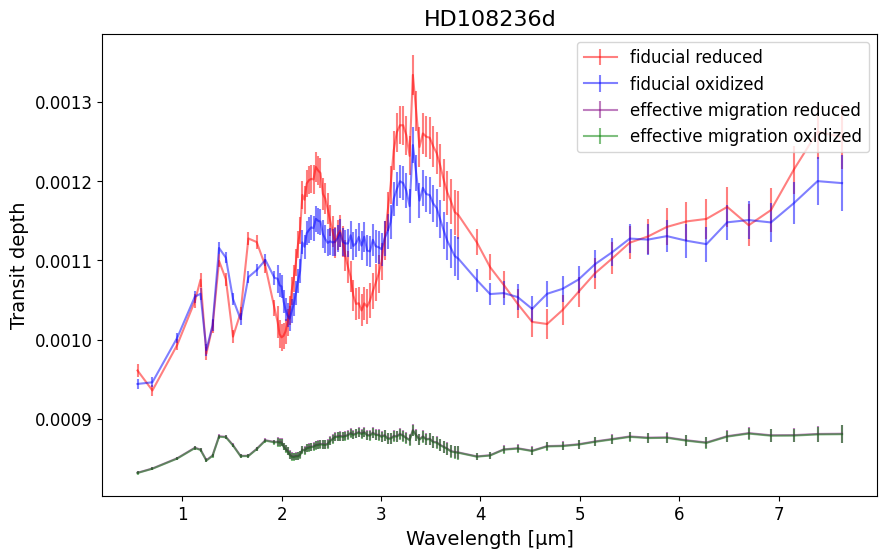

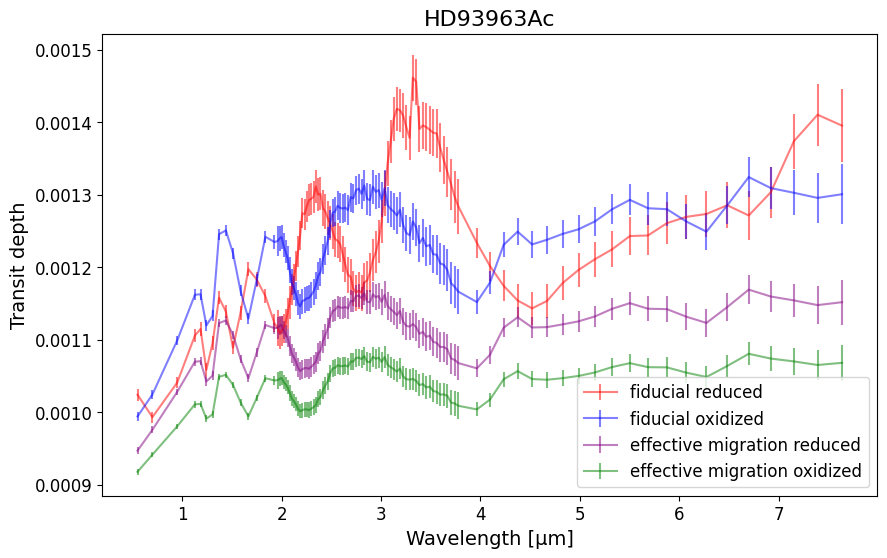

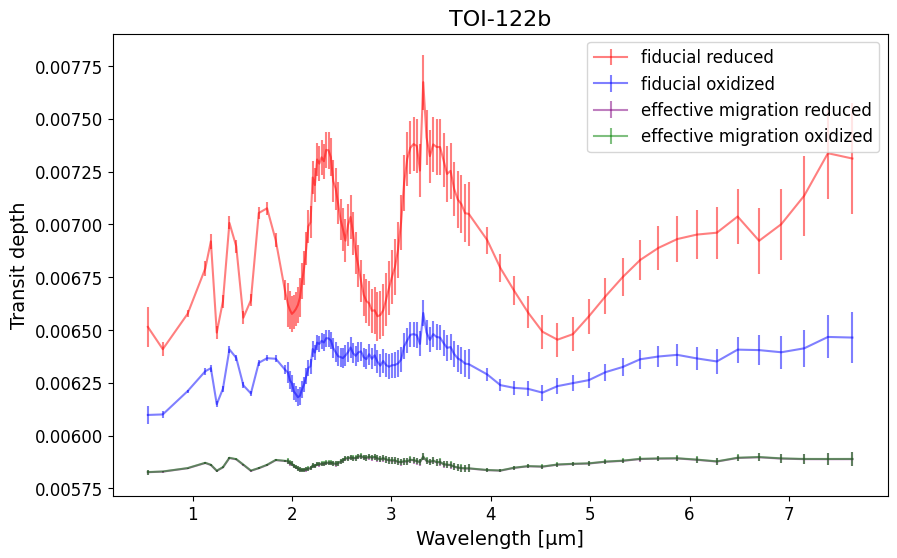

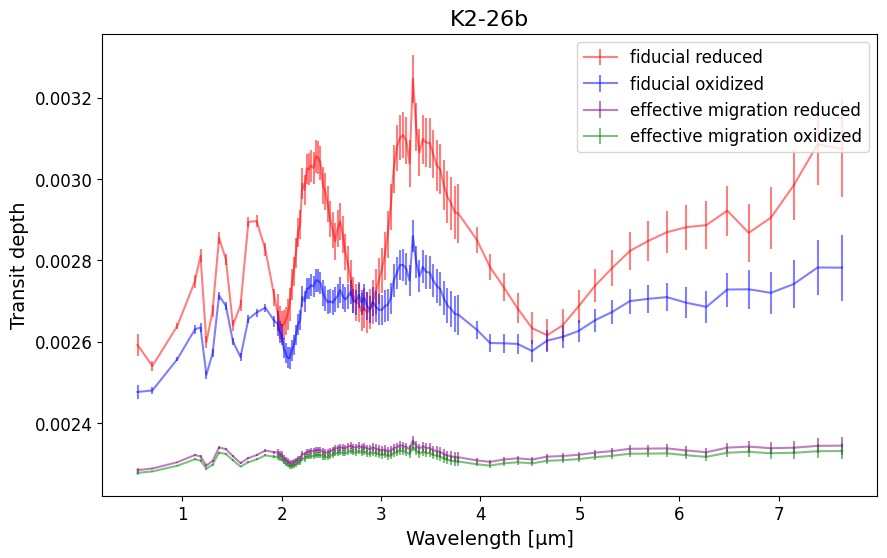

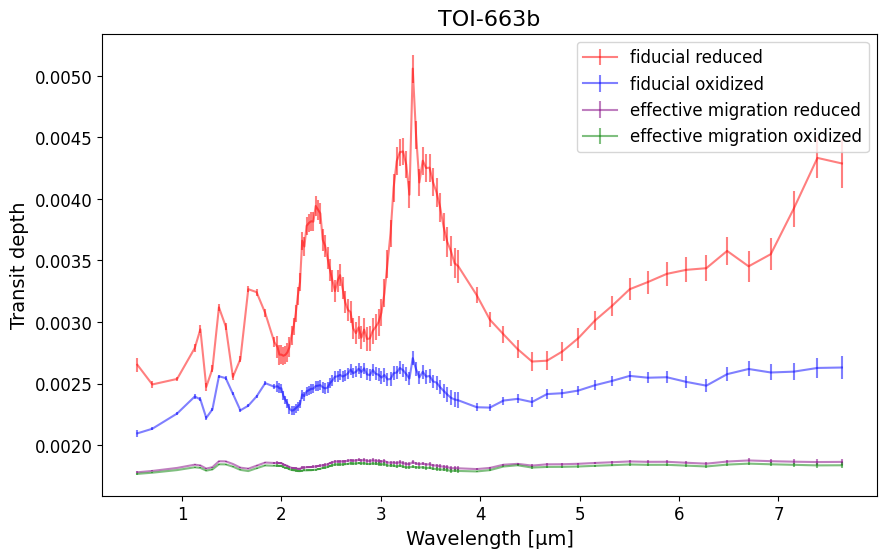

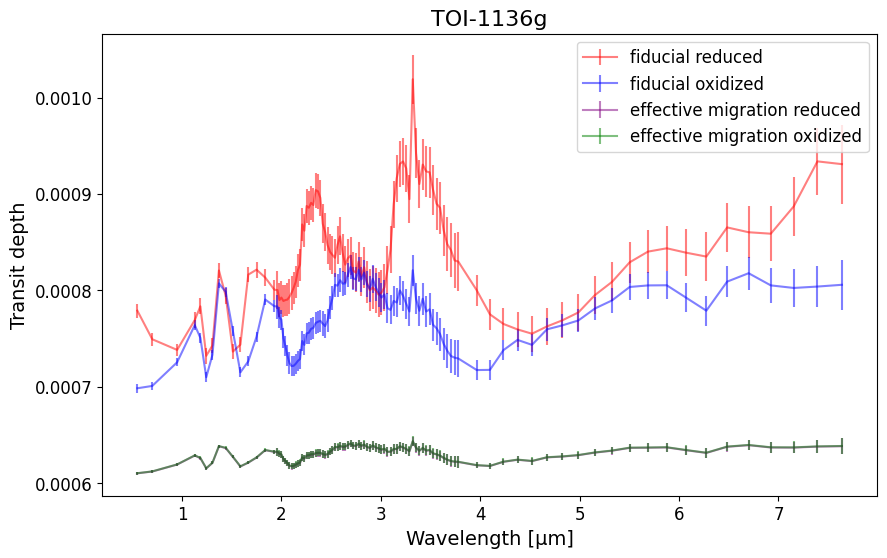

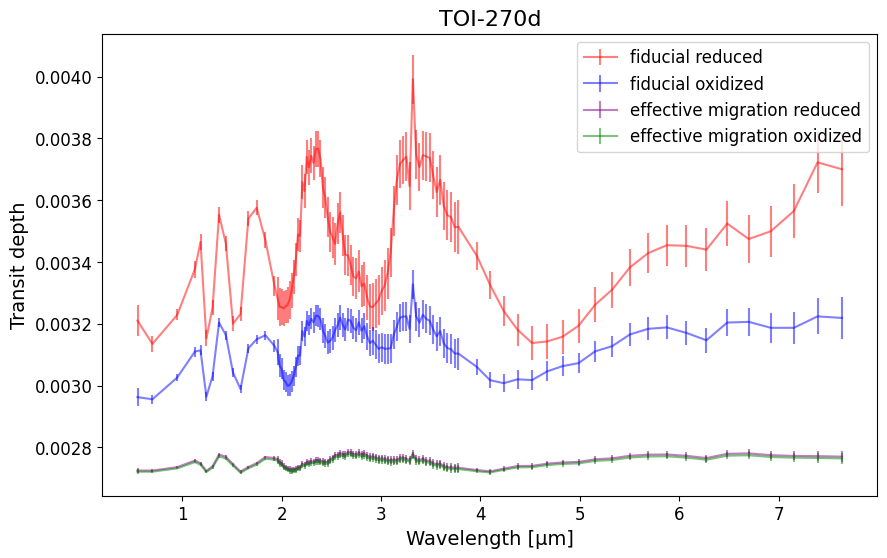

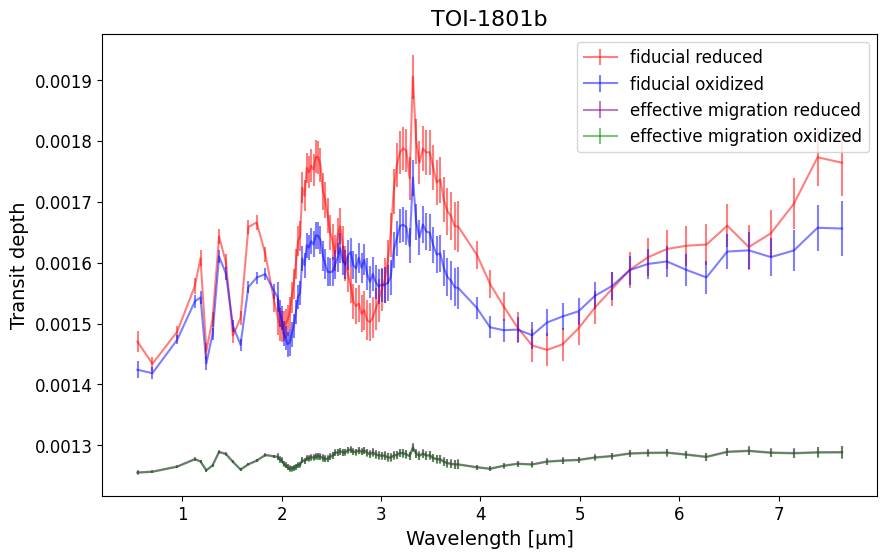

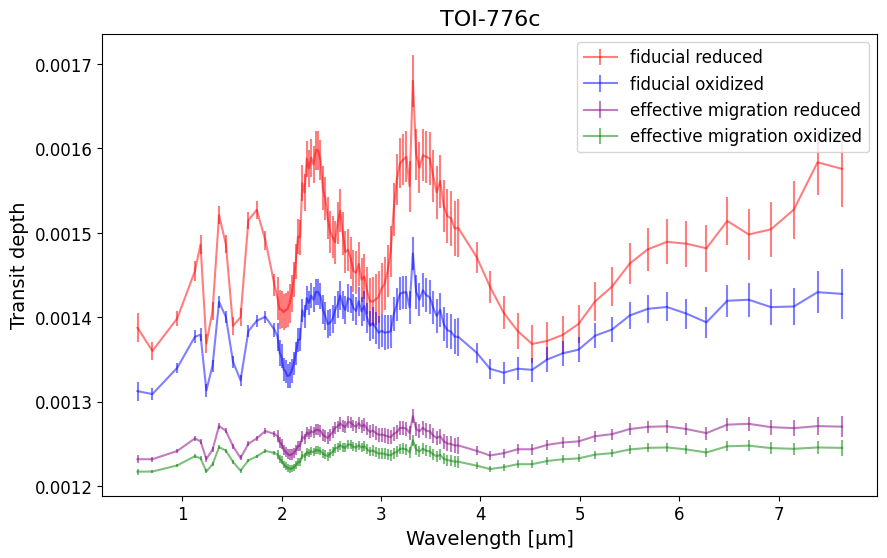

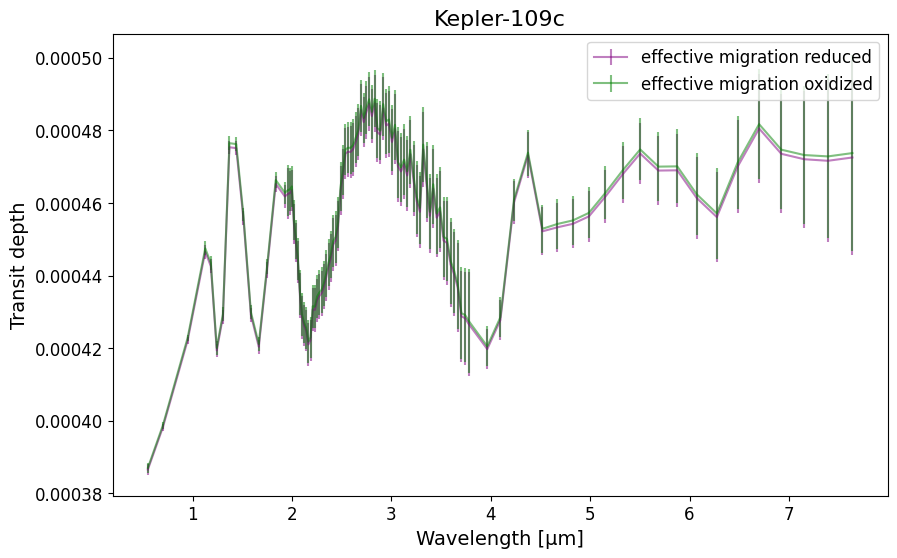

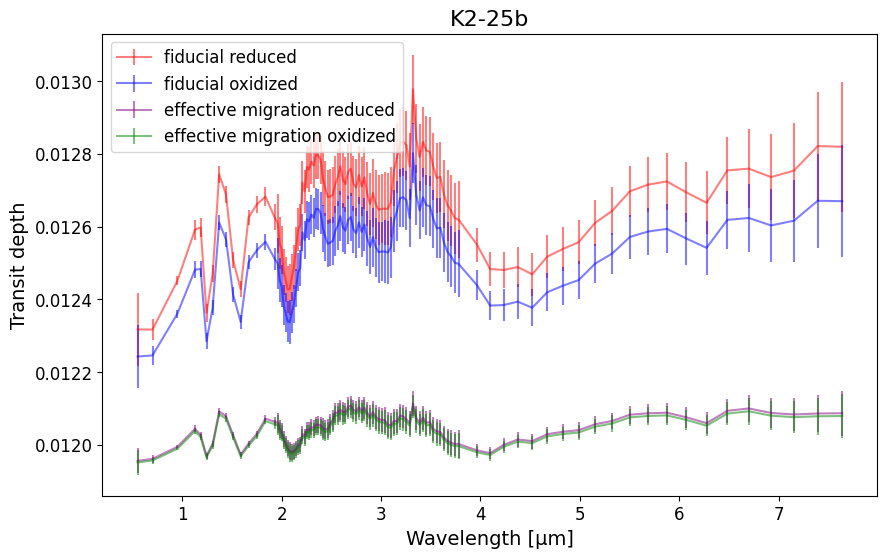

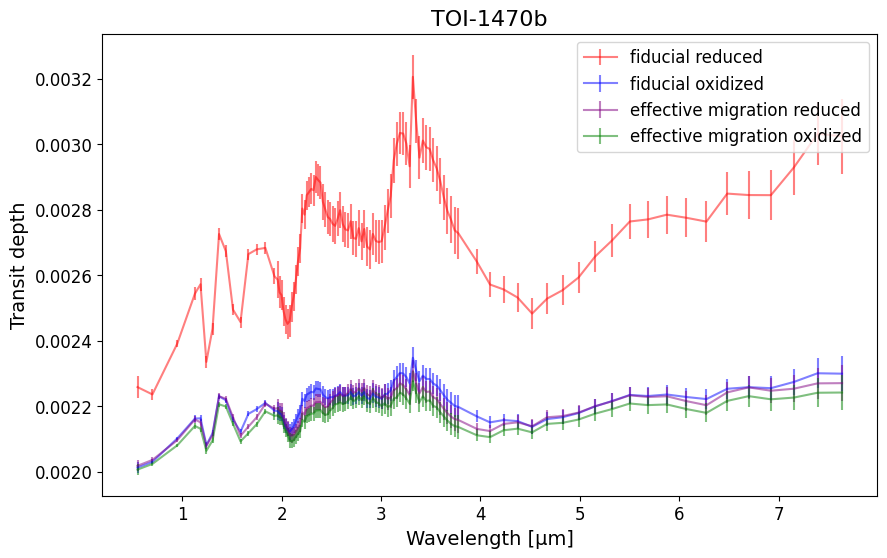

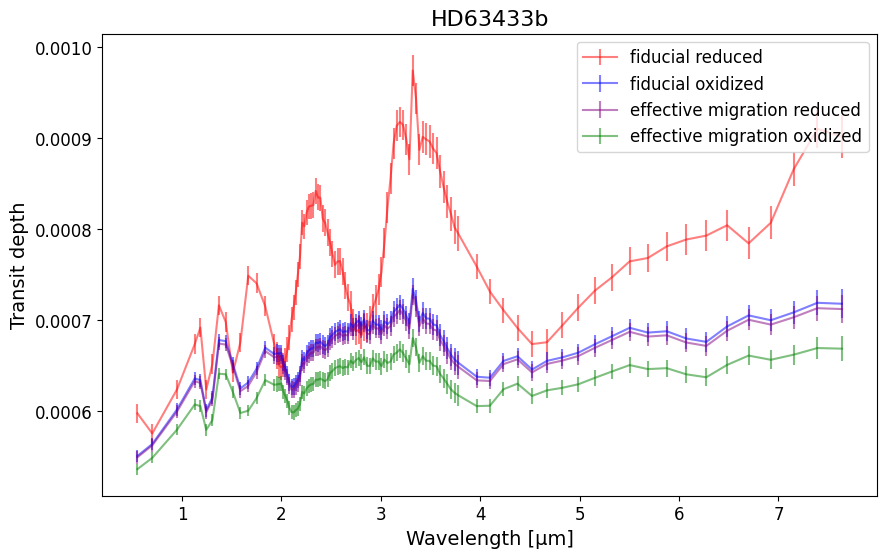

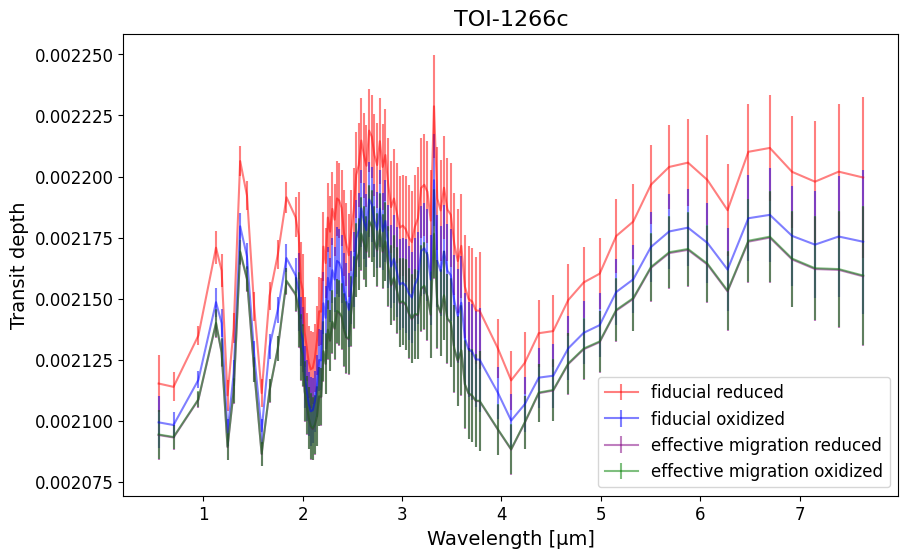

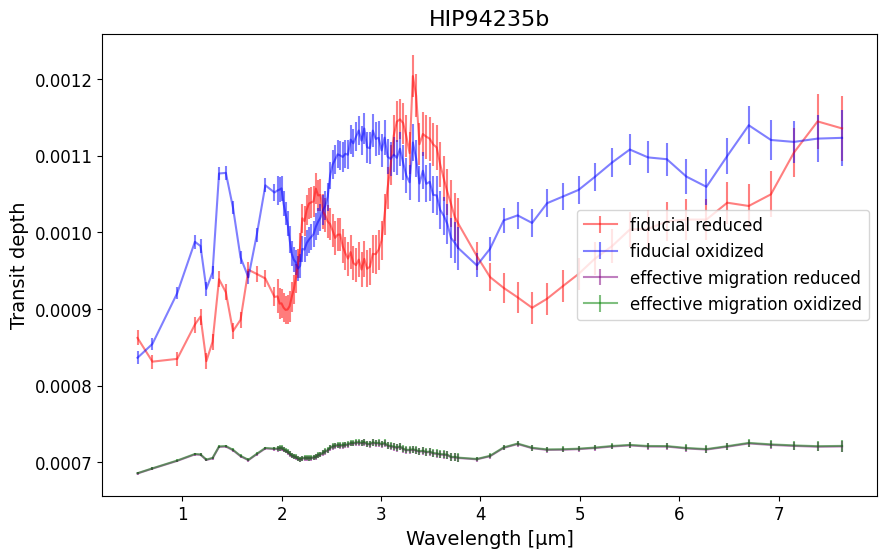

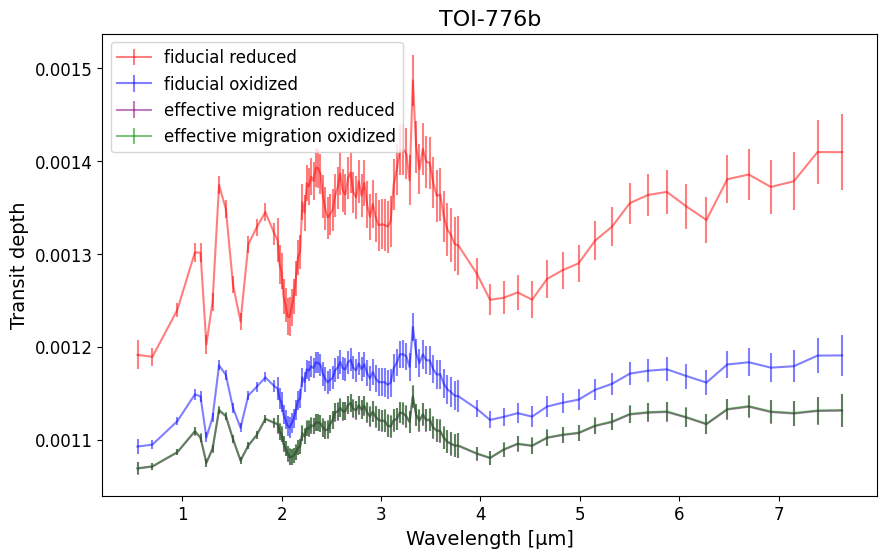

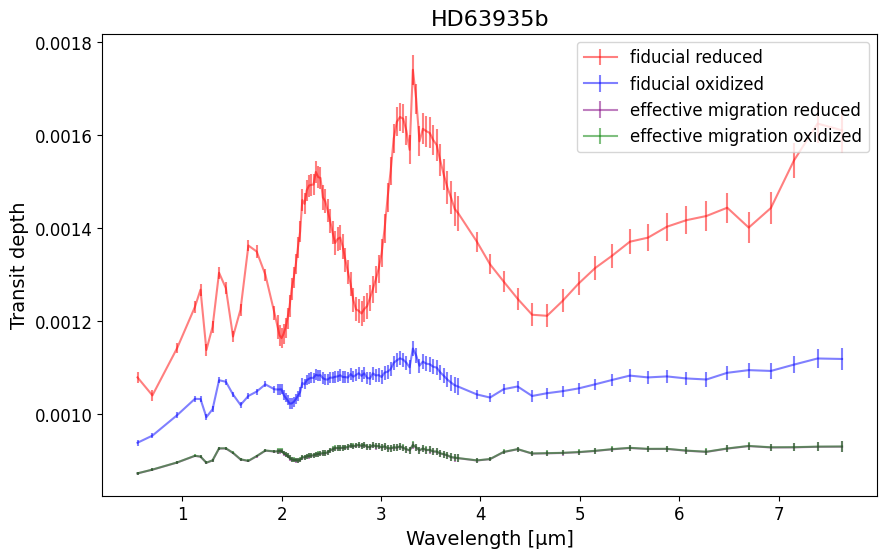

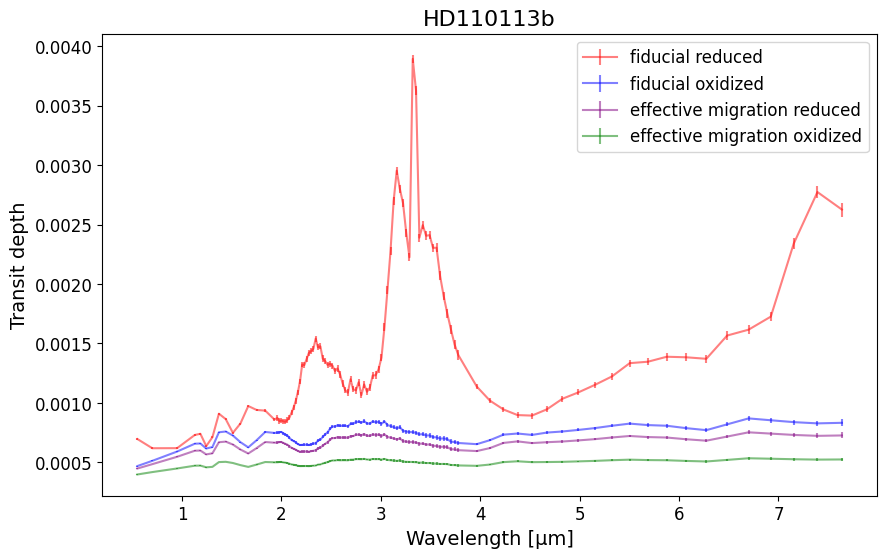

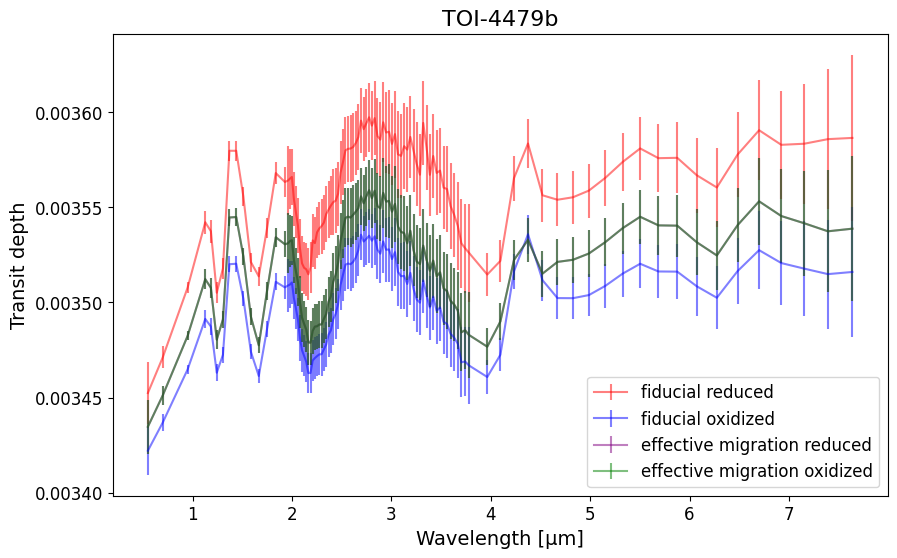

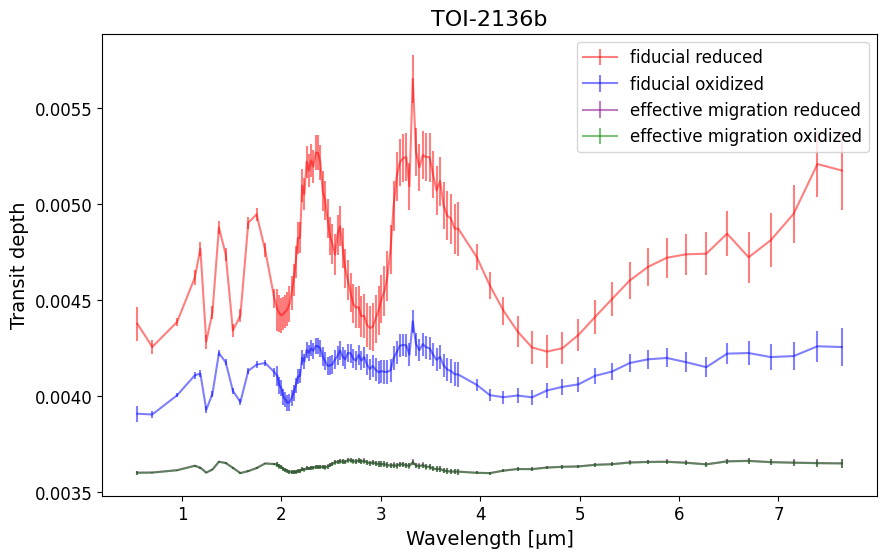

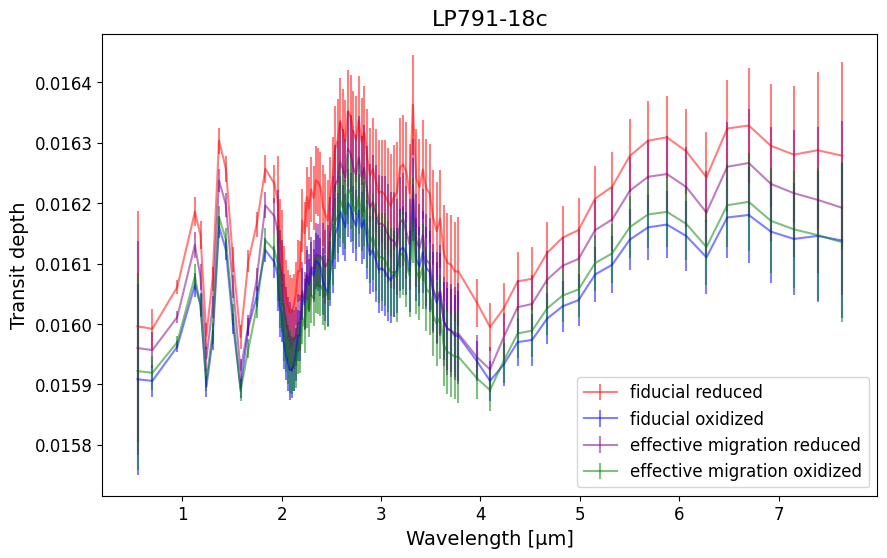

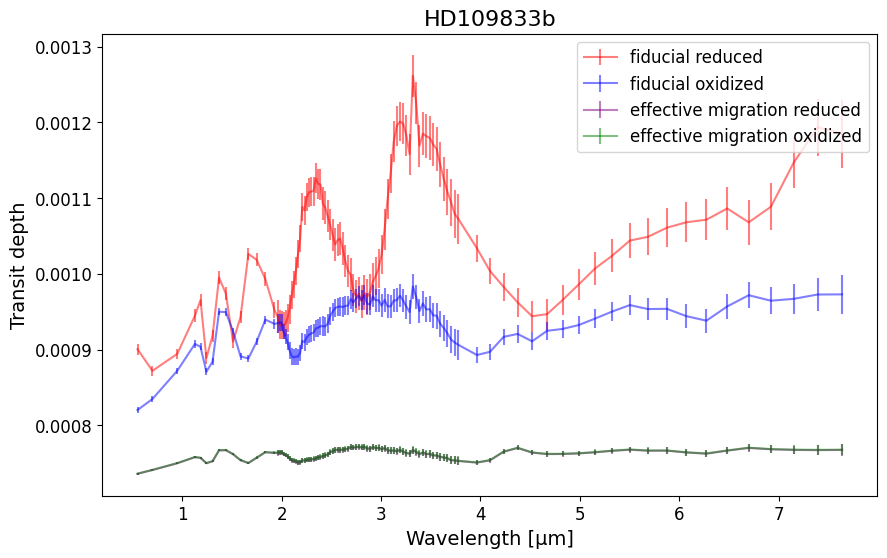

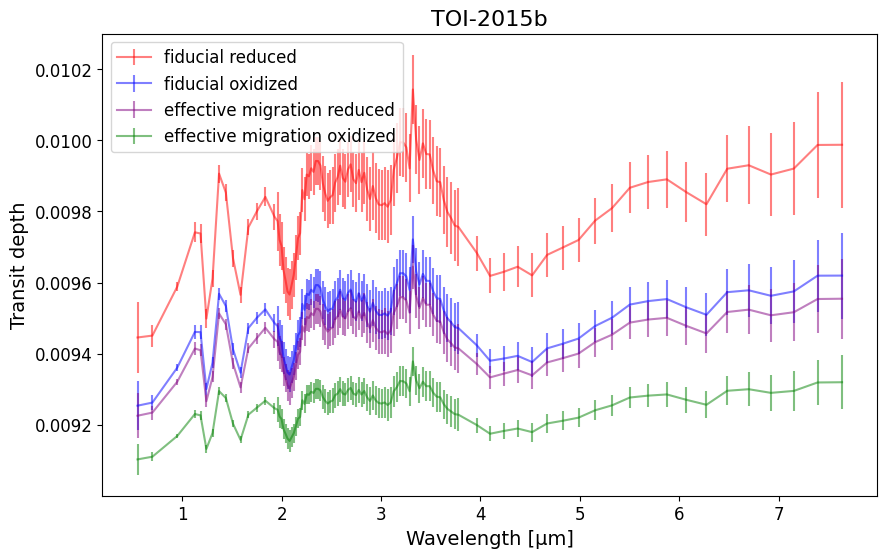

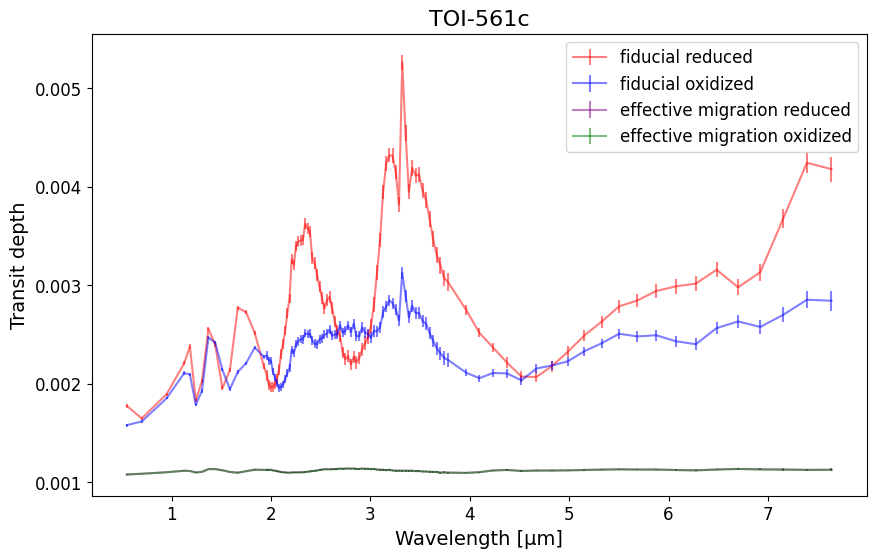

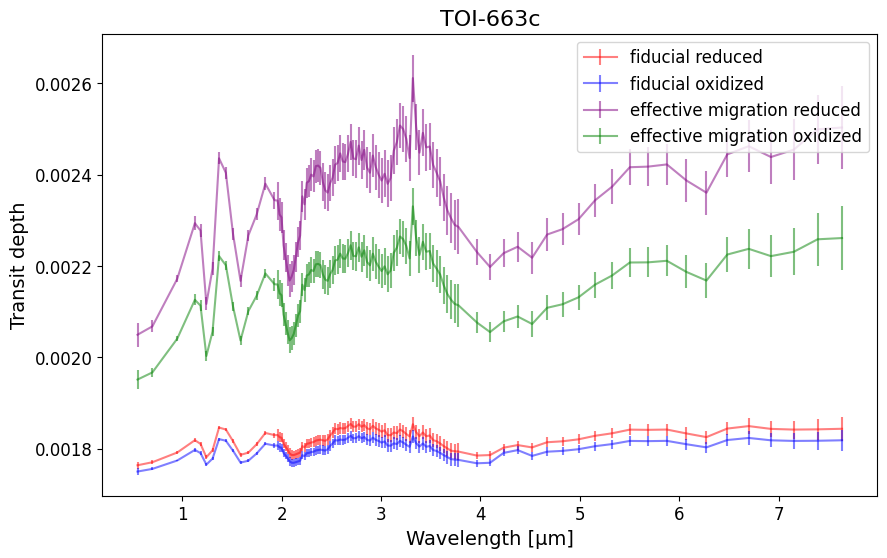

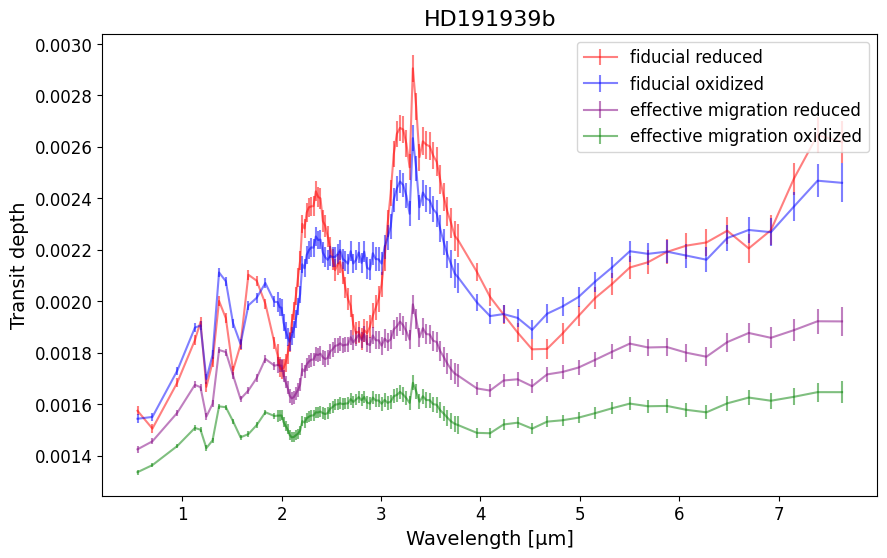

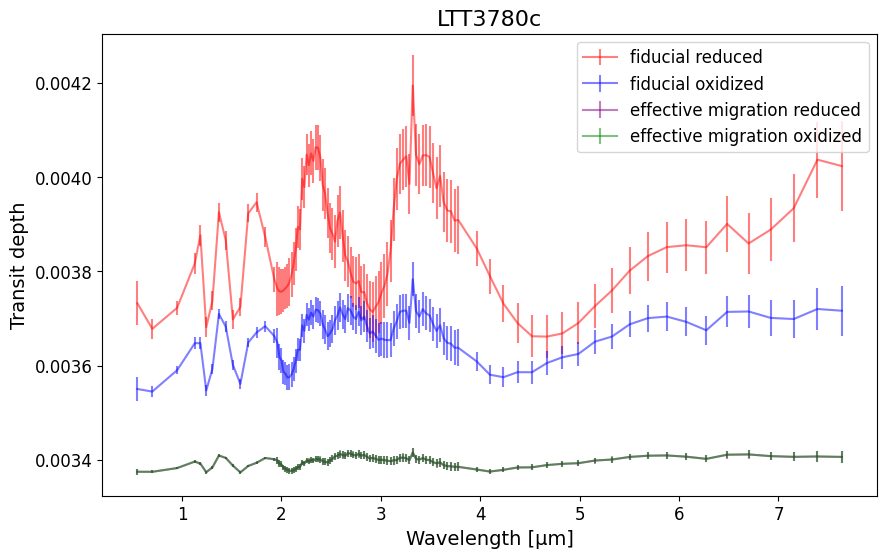

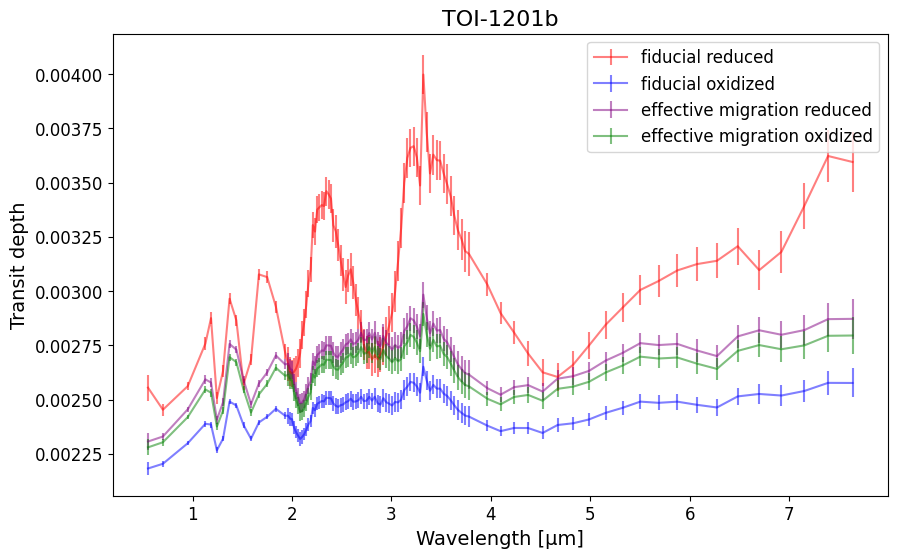

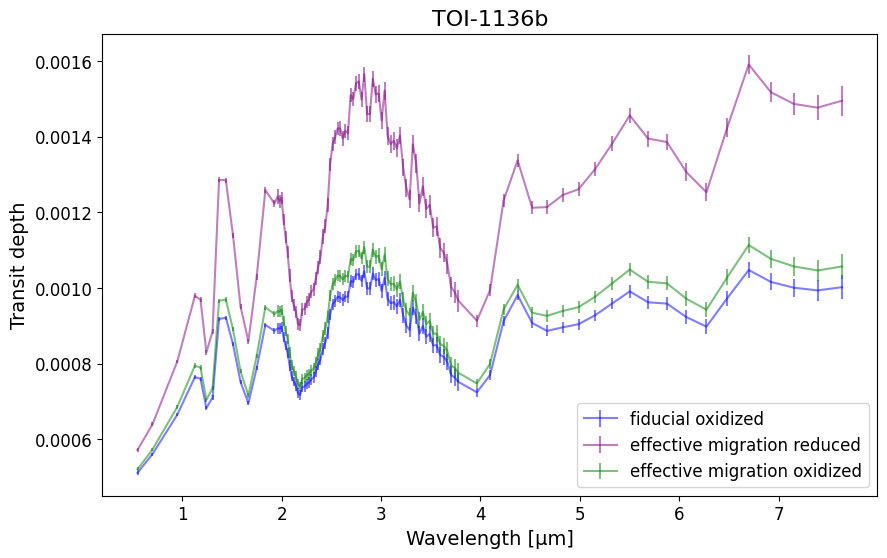

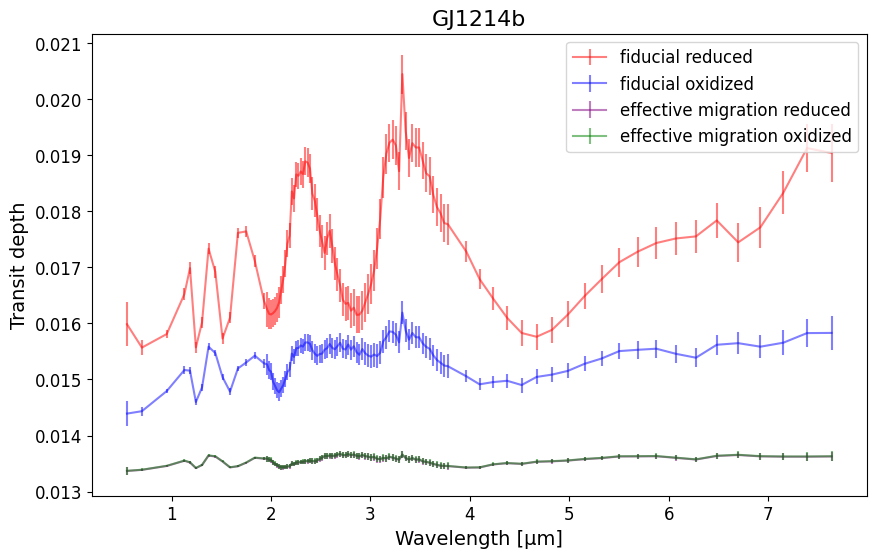

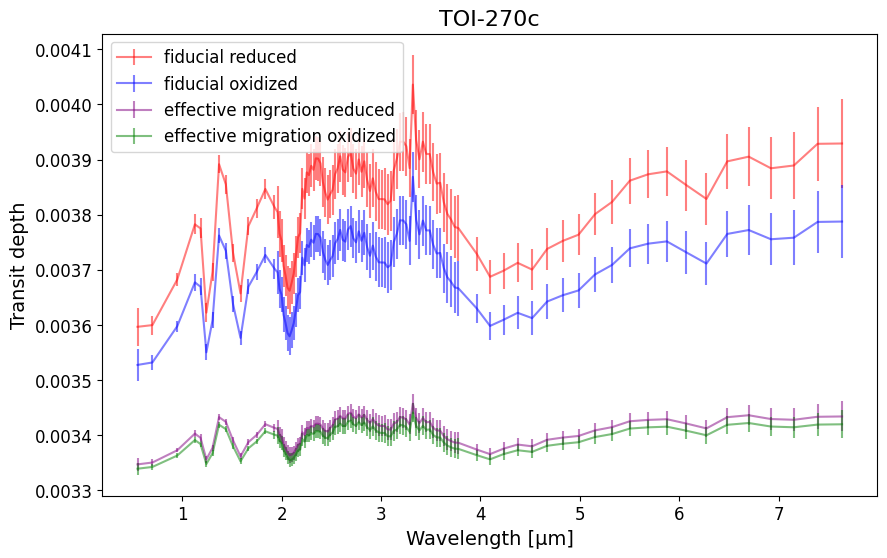

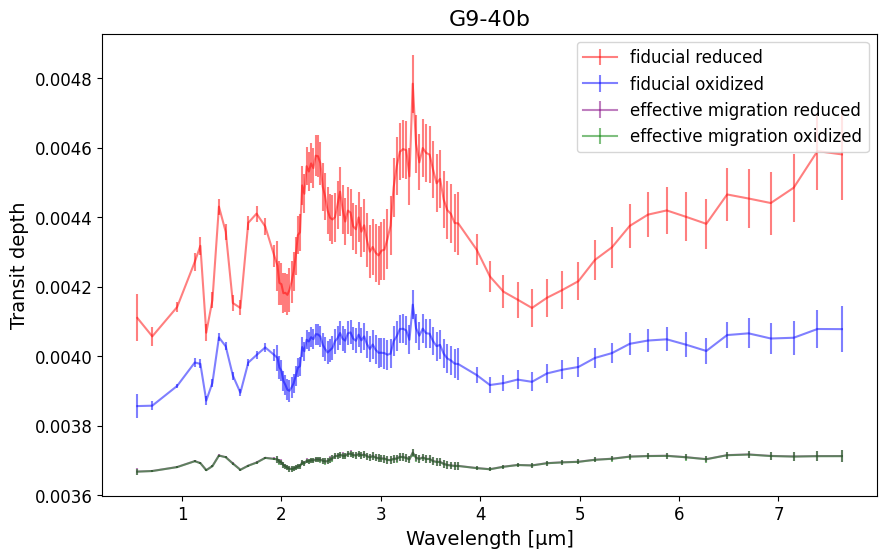

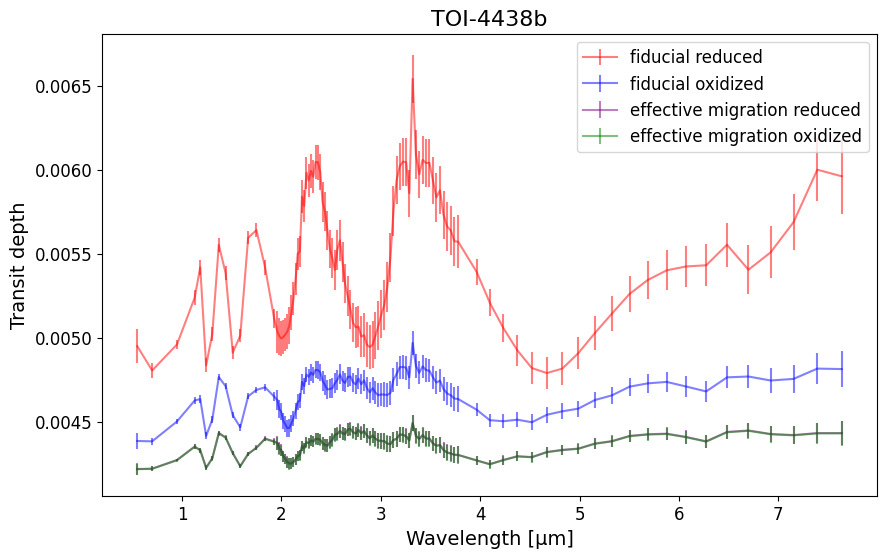

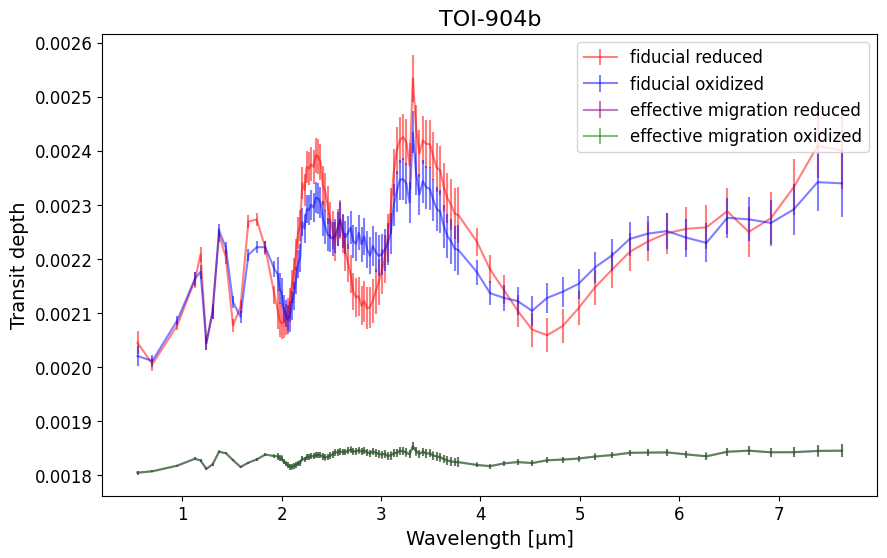

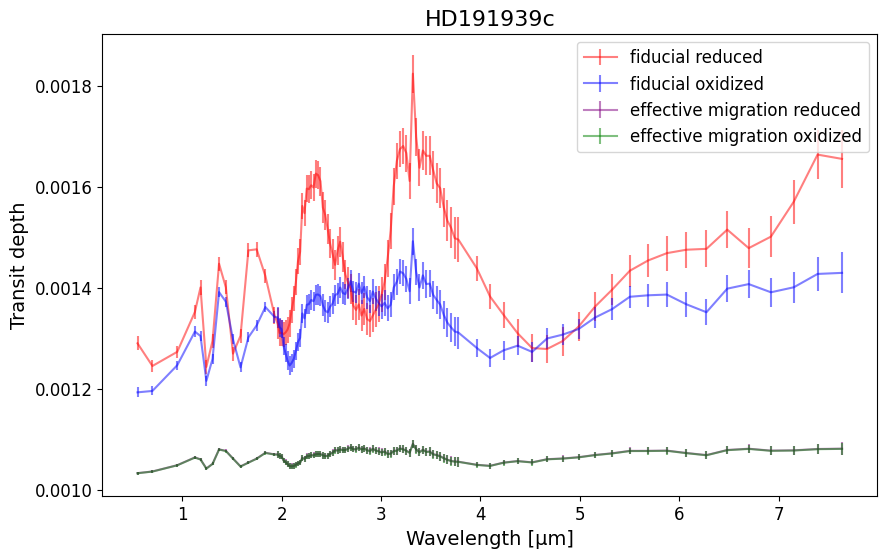

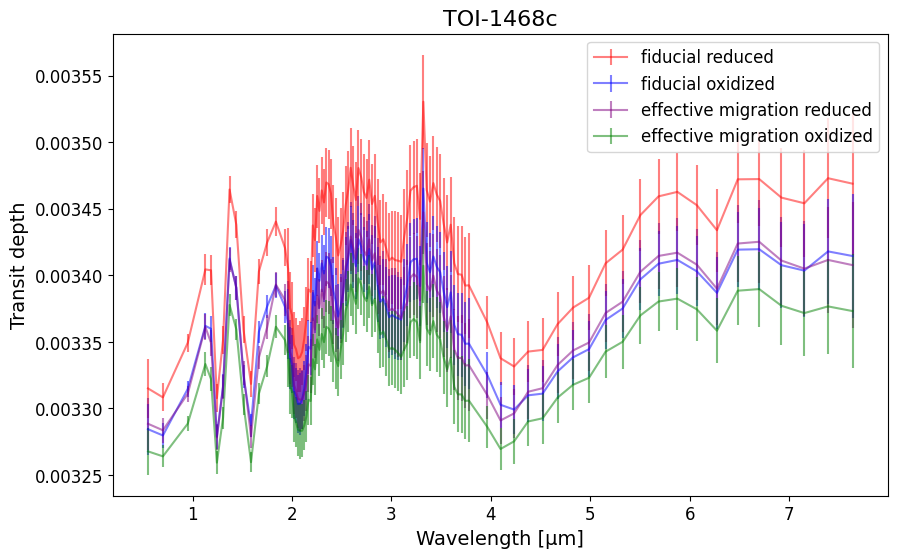

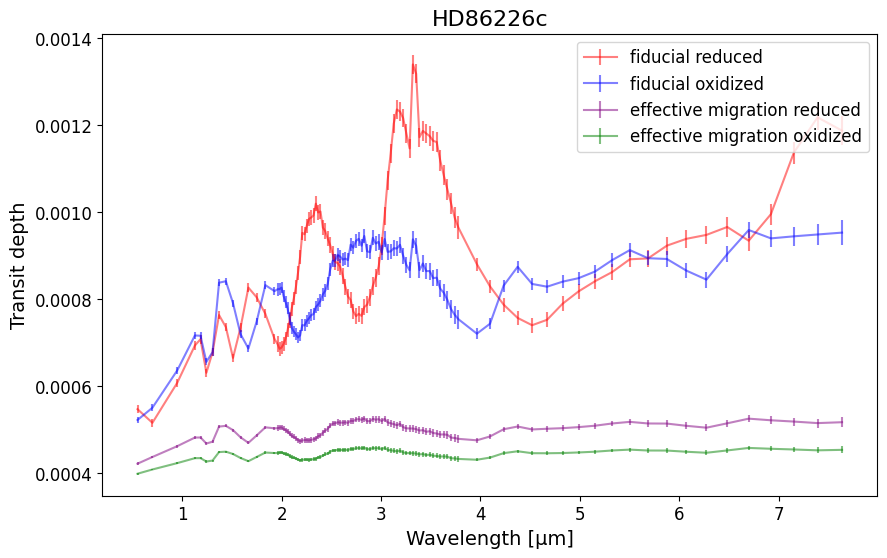

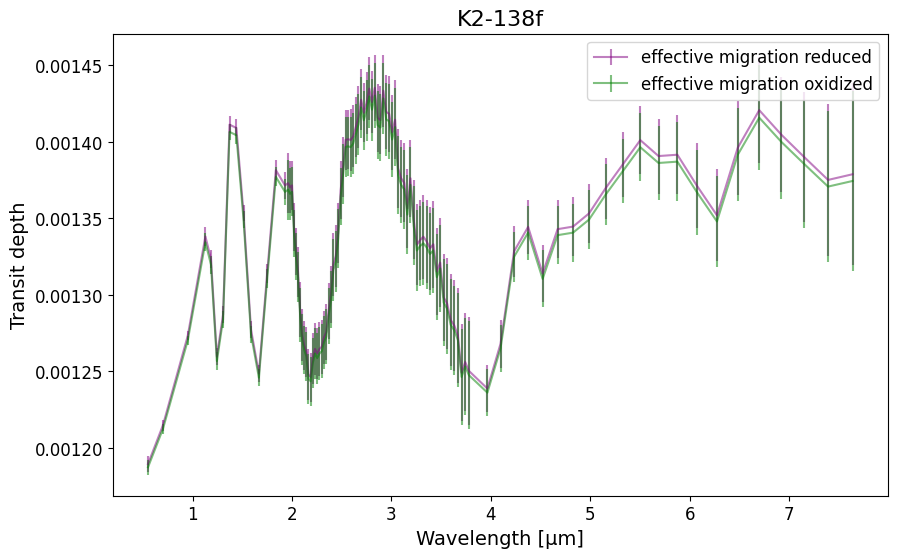

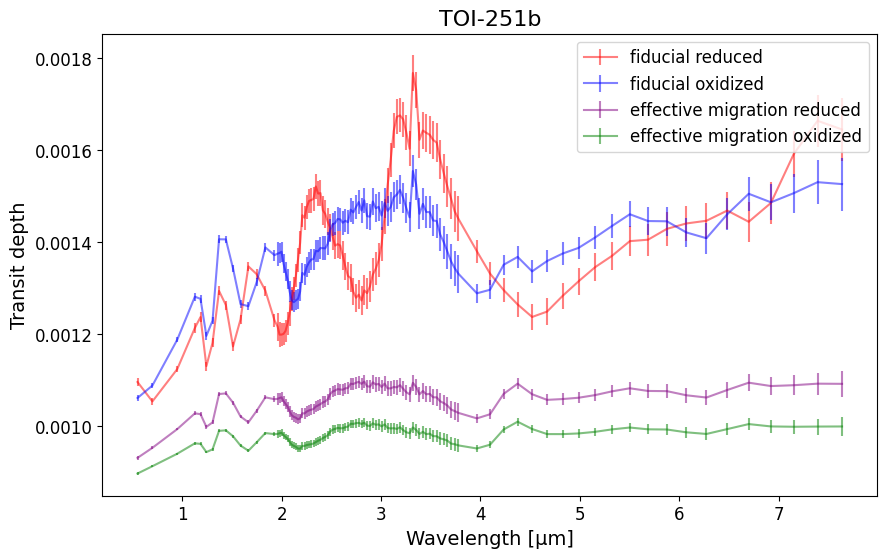

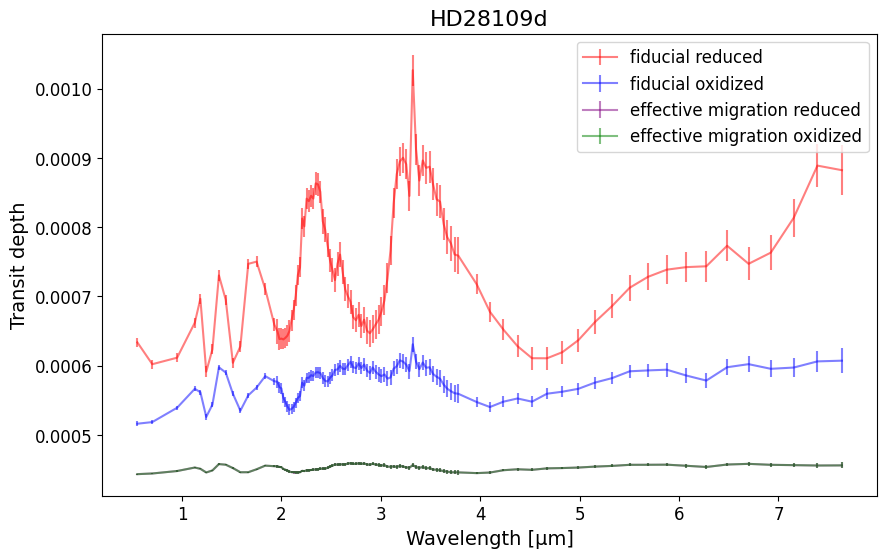

In [ ]:
# Example plotting

# Define the planet you are interested in
pls = [name.replace("Mig", "").replace("Fidu", "").replace("R", "") for name in subfolders_week5]
pls.sort()
pls = list(set(pls))
print(pls)

# "Kepler-109cb"

# Define expected modes and corresponding colours
modes = ['FiduR', 'Fidu', 'MigR', 'Mig']   # Order matters: 0=red, 1=blue, 2=purple, 3=green
colors = ['red', 'blue', 'purple', 'green']

for pl in pls:
    fig = plt.figure(figsize=(10, 6))

    for mode, color in zip(modes, colors):
        # Try to find the file with the current mode
        possible_names = [
            f"{pl}{mode}",
            f"{pl}_{mode}",  # just in case there is an underscore
        ]
        file_found = None

        for name in possible_names:
            if name in subfolders_week5:
                file_found = (week5_directory, name)
                break
            elif name in subfolders_week4:
                file_found = (week4_directory, name)
                break

        if file_found is None:
            # No file for this mode, skip
            continue

        directory, file_ = file_found
        path = os.path.join(directory, file_, file_ + '.txt')

        try:
            data = np.loadtxt(path).T
            if np.isnan(data[1]).all():
                continue
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue

        # Build label
        label = "effective migration" if "Mig" in file_ else "fiducial"
        label += " reduced" if "R" in file_ else " oxidized"

        # Plot
        plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.5, label=label, color=color)

    plt.title(f"{pl}")
    plt.legend()
    plt.xlabel('Wavelength [μm]')
    plt.ylabel('Transit depth')
    plt.savefig(f"plots/{pl}.png", dpi=300)
    plt.close()